# Finance back-and-forths (1st):

### Retrieving daily data from stocks from multiple sources, creating graphs regarding Moving Averages using Plotly and Matplotlib, creating a hypothetical portfolio and checking the variance and expected return of the selected choices, cheking ValueatRisk(VaR) for 100k Reais for one day and 120 day graph, applying pyfolio for checking common statistics like Sharpe, Sortino etc. 

In [3]:
# Library imports

In [11]:
!pip install yfinance

You should consider upgrading via the 'C:\Users\pedro\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=29246d3cc18c5ba5bffdf0512633313e50c912bce77519d3b121c8922df7fc85
  Stored in directory: c:\users\pedro\appdata\local\pip\cache\wheels\b4\c3\39\9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=009fee56b06ac46dc9079dfdd654bd4fe6e5ce1838b4fa623e66d70df1b7111d
  Stored in directory: c:\users\pedro\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [15]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Users\pedro\anaconda3\python.exe -m pip install --upgrade pip' command.


In [165]:
import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import plotly.graph_objects as go # We are only importing the 'graph_objects' module from plotly here
import matplotlib.mlab as mlab
import scipy
import pyfolio as pf
import warnings
import investpy as inv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

C:\Users\pedro\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning:

Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.



In [198]:
# Retriving Data from IBOV

In [187]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [188]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,119261.00,121117.000000,119261.00,119925.000000,119925.000000,8208400
2021-02-08,120239.00,120844.000000,119140.00,119516.000000,119516.000000,8619100
2021-02-09,119696.00,119975.000000,118246.00,119429.000000,119429.000000,7913500
2021-02-10,119472.00,119738.000000,117970.00,118430.000000,118430.000000,8644600
2021-02-11,118439.75,120282.757812,118439.75,119299.828125,119299.828125,0


In [21]:
# retrieving Data from Downstream companies (CSAN3.SA, BRDT3.SA,)

In [4]:
raizen = web.get_data_yahoo('CSAN3.SA')

[*********************100%***********************]  1 of 1 completed


In [6]:
raizen.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,79.930000,80.370003,78.839996,79.550003,79.550003,501200
2021-02-08,78.889999,85.870003,78.559998,85.489998,85.489998,3945600
2021-02-09,85.000000,86.309998,82.500000,83.580002,83.580002,2485400
2021-02-10,83.989998,83.989998,81.169998,81.360001,81.360001,990600
2021-02-11,85.199997,88.389999,85.000000,86.650002,86.650002,2169800


In [5]:
br = web.get_data_yahoo('BRDT3.SA')

[*********************100%***********************]  1 of 1 completed


In [7]:
br.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,22.900000,22.950001,22.51,22.610001,22.610001,5642300.0
2021-02-08,22.590000,23.040001,22.24,22.430000,22.430000,16276700.0
2021-02-09,22.410000,22.430000,22.08,22.379999,22.379999,11396200.0
2021-02-10,22.389999,22.639999,22.00,22.040001,22.040001,6988100.0
2021-02-11,22.400000,22.969999,22.24,22.510000,22.510000,6103800.0


In [8]:
ugp = web.get_data_yahoo('UGP')

[*********************100%***********************]  1 of 1 completed


In [9]:
ugp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,4.40,4.480,4.37,4.41,4.41,925900
2021-02-08,4.40,4.520,4.39,4.48,4.48,597400
2021-02-09,4.37,4.550,4.35,4.51,4.51,1321100
2021-02-10,4.40,4.430,4.36,4.40,4.40,1284400
2021-02-11,4.44,4.465,4.27,4.29,4.29,1175546


In [10]:
ugpa = web.get_data_yahoo('UGPA3.SA')

[*********************100%***********************]  1 of 1 completed


In [11]:
ugpa.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,23.440001,23.990000,23.299999,23.920000,23.920000,2571200
2021-02-08,23.600000,24.080000,23.379999,23.860001,23.860001,5699400
2021-02-09,23.639999,24.459999,23.540001,24.389999,24.389999,6084800
2021-02-10,23.760000,24.129999,23.500000,23.530001,23.530001,8405300
2021-02-11,23.639999,23.990000,23.030001,23.070000,23.070000,3589300


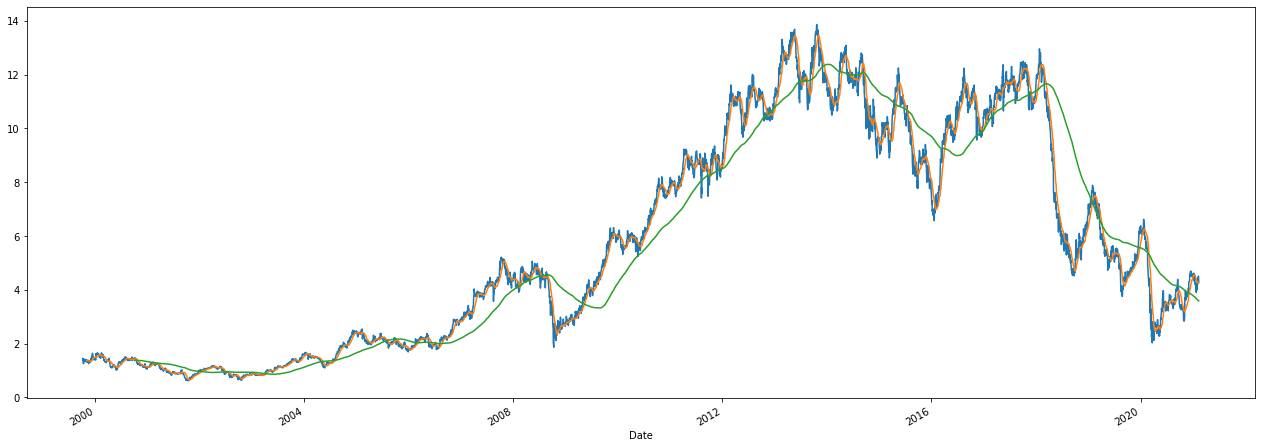

In [12]:
ugp['Close'].plot(figsize=(22,8))
ugp['Close'].rolling(21).mean().plot()
ugp['Close'].rolling(252).mean().plot()

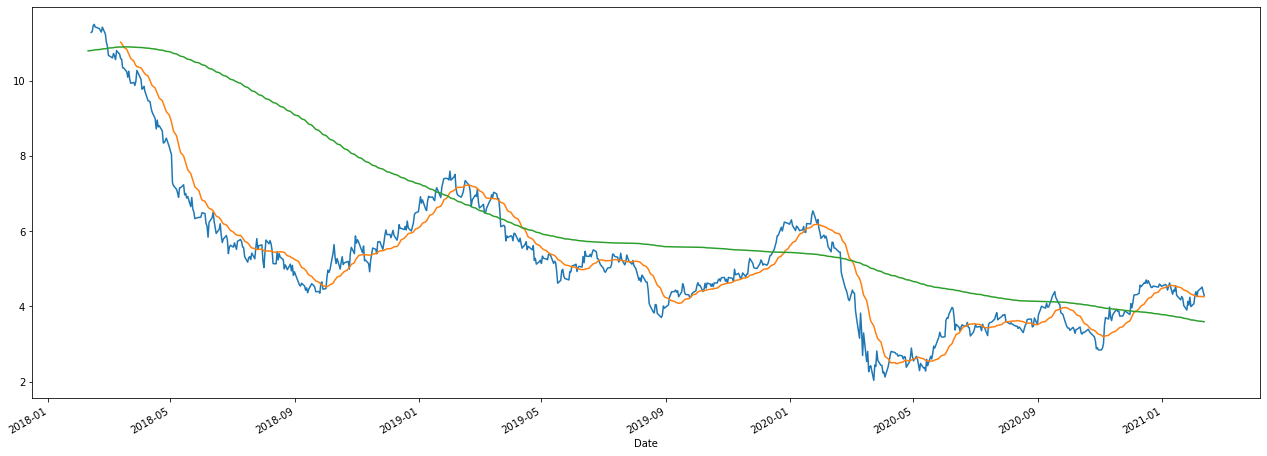

In [14]:
ugp_3anos=ugp.tail(252*3)
ugp_4anos=ugp.tail(252*4)
ugp_3anos['Adj Close'].plot(figsize=(22,8))
ugp_3anos['Adj Close'].rolling(21).mean().plot()
ugp_4anos['Adj Close'].rolling(252).mean().plot()

In [25]:
#You'll first create a data object, in this particular case a line

data_1 = dict(type='scatter', 
            x=ugp_3anos.index,
            y=ugp_3anos['Adj Close'],
            name='price_last_3anos'
           )
data_2 = dict(type='scatter', 
            x=ugp_4anos.index,
            y=ugp_4anos['Adj Close'].rolling(21).mean(),
            name='MA_21days'
           )
data_3 = dict(type='scatter', 
            x=ugp_4anos.index,
            y=ugp_4anos['Adj Close'].rolling(252).mean(),
            name='MA_252days'
           )
full_data = [data_1, data_2, data_3]

In [26]:
# As you can start to notice both data and layout parameters have similar 'dict' structures

layout = dict(title=dict(text='UGP',
                        font=dict(color='yellow')),
              xaxis=dict(title='Years'),
              yaxis=dict(title='Price')
             )

In [34]:
# Again embedding a figure with both data and now layout

clear_figure = go.Figure(data=full_data,
                        layout=layout)
clear_figure.show()

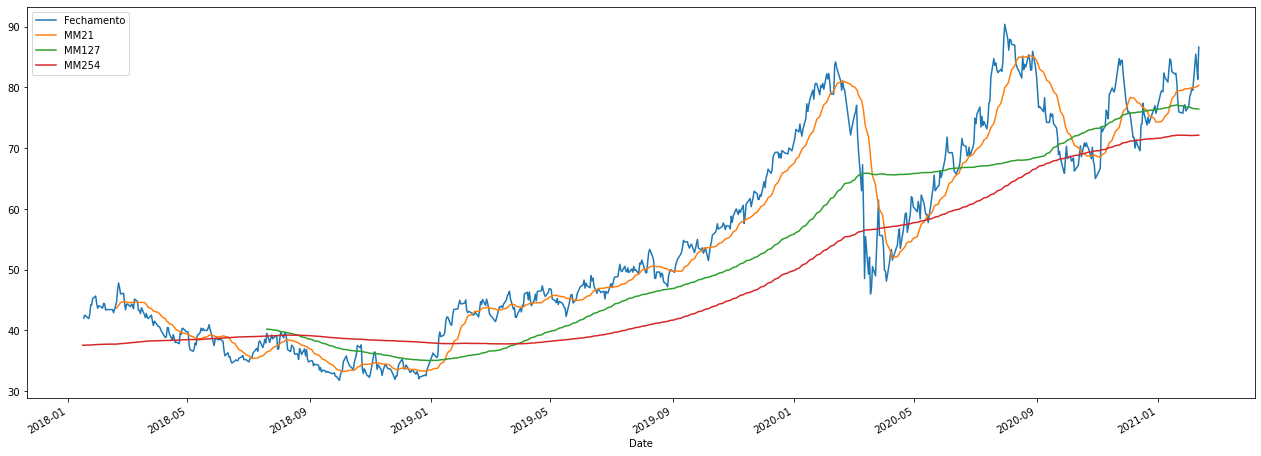

In [31]:
raizen_3anos=raizen.tail(252*3)
raizen_4anos=raizen.tail(252*4)
raizen_3anos['Close'].plot(figsize=(22,8), label="Fechamento")
raizen_3anos['Close'].rolling(21).mean().plot(label='MM21')
raizen_3anos['Close'].rolling(126).mean().plot(label='MM127')
raizen_4anos['Close'].rolling(252).mean().plot(label='MM254')
plt.legend()

In [32]:
#You'll first create a data object, in this particular case a line

r_data_1 = dict(type='scatter', 
            x=raizen_3anos.index,
            y=raizen_3anos['Adj Close'],
            name='price_last_3anos'
           )
r_data_2 = dict(type='scatter', 
            x=raizen_4anos.index,
            y=raizen_4anos['Adj Close'].rolling(21).mean(),
            name='MA_21days'
           )
r_data_3 = dict(type='scatter', 
            x=raizen_4anos.index,
            y=raizen_4anos['Adj Close'].rolling(252).mean(),
            name='MA_252days'
           )
r_full_data = [r_data_1, r_data_2, r_data_3]

In [33]:
# As you can start to notice both data and layout parameters have similar 'dict' structures

r_layout = dict(title=dict(text='CSAN',
                        font=dict(color='purple')),
              xaxis=dict(title='Years'),
              yaxis=dict(title='Price')
             )

In [36]:
# Again embedding a figure with both data and now layout

r_clear_figure = go.Figure(data=r_full_data,
                        layout=r_layout)
r_clear_figure.show()

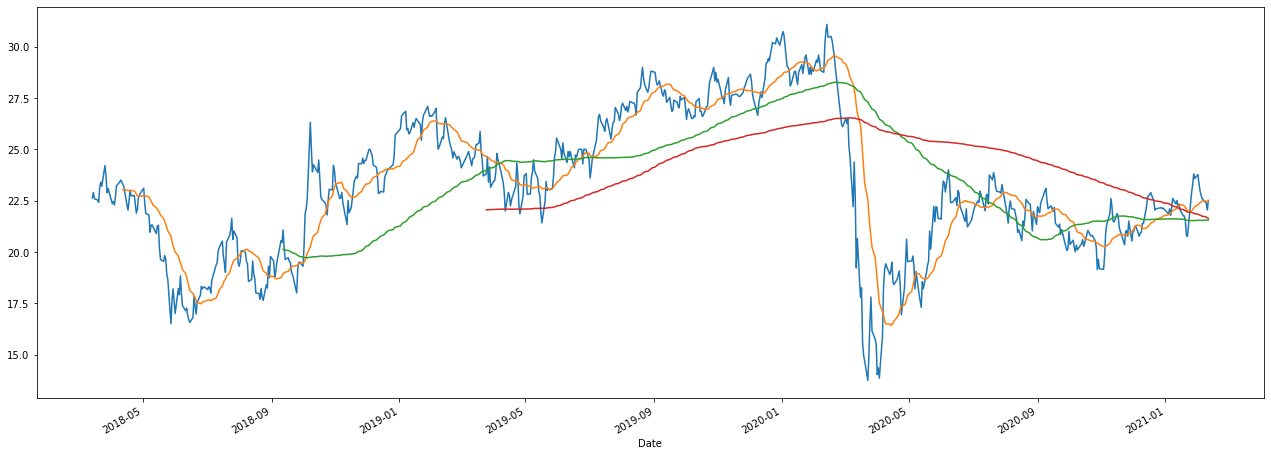

In [37]:
br_3anos=br.tail(252*3)
br_4anos=br.tail(252*4)
br_3anos['Close'].plot(figsize=(22,8))
br_3anos['Close'].rolling(21).mean().plot()
br_3anos['Close'].rolling(126).mean().plot()
br_4anos['Close'].rolling(252).mean().plot()

In [46]:
#You'll first create a data object, in this particular case a line

b_data_1 = dict(type='scatter', 
            x=br_3anos.index,
            y=br_3anos['Adj Close'],
            name='price_last_3anos'
           )
b_data_2 = dict(type='scatter', 
            x=br_4anos.index,
            y=br_4anos['Adj Close'].rolling(21).mean(),
            name='MA_21days'
           )
b_data_3 = dict(type='scatter', 
            x=br_4anos.index,
            y=br_4anos['Adj Close'].rolling(252).mean(),
            name='MA_252days'
           )
b_data_4 = dict(type='scatter', 
            x=br_4anos.index,
            y=br_4anos['Adj Close'].rolling(126).mean(),
            name='MA_126days'
           )
b_full_data = [b_data_1, b_data_2, b_data_3, b_data_4]

In [47]:
# As you can start to notice both data and layout parameters have similar 'dict' structures

b_layout = dict(title=dict(text='BRDT',
                        font=dict(color='green')),
              xaxis=dict(title='Years'),
              yaxis=dict(title='Price')
             )

In [48]:
# Again embedding a figure with both data and now layout

b_clear_figure = go.Figure(data=b_full_data,
                        layout=b_layout)
b_clear_figure.show()

In [51]:
# Usando Investpy

In [52]:
!pip install investpy

  Created wheel for investpy: filename=investpy-1.0.1-py3-none-any.whl size=4473071 sha256=765398bf828193c6664136c0ac0fc0b4d7fea82d4379980a964a3b18121739f6
  Stored in directory: c:\users\pedro\appdata\local\pip\cache\wheels\ae\82\a4\d5d19b8f4cda7fe1f46d3372520fec58fcce751f4254ea219a
Successfully built investpy


You should consider upgrading via the 'C:\Users\pedro\anaconda3\python.exe -m pip install --upgrade pip' command.


In [54]:
fundos_br = inv.get_funds(country='brazil')
fundos_pt = inv.get_funds(country='portugal')

In [55]:
len(fundos_pt)

15

In [59]:
pt_funds_names = list(fundos_pt['name'])

In [60]:
funds = inv.get_fund_historical_data(pt_funds_names[0],\
                                     country='portugal',\
                                     from_date='01/01/1990',\
                                     to_date='02/01/2021')

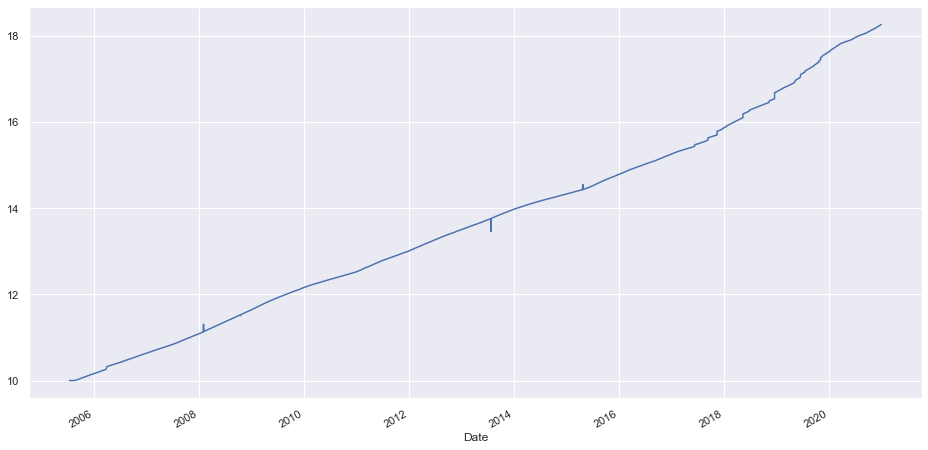

In [63]:
funds['Close'].plot()

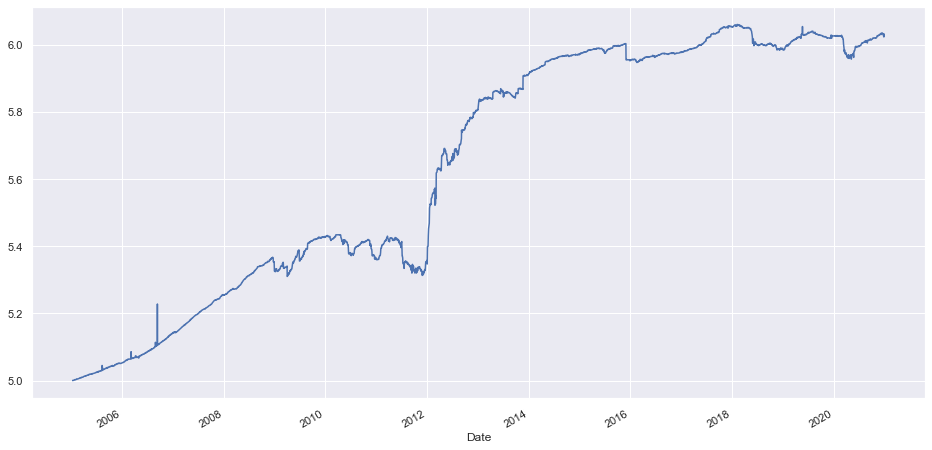

In [64]:
funds_1 = inv.get_fund_historical_data(pt_funds_names[1],\
                                     country='portugal',\
                                     from_date='01/01/1990',\
                                     to_date='02/01/2021')
funds_1['Close'].plot()

In [5]:
tickers = ['CSAN3.SA', 'BRDT3.SA', 'UGPA3.SA', 'BZ=F', '^BVSP']

In [6]:
fechamento = web.get_data_yahoo(tickers)['Close']
volume = web.get_data_yahoo(tickers)['Volume']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [8]:
fechamento_last_3_anos = fechamento.tail(252*3)

In [12]:
fechamento_3_limpo = fechamento_last_3_anos.dropna() 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA49A75700>,
      dtype=object)

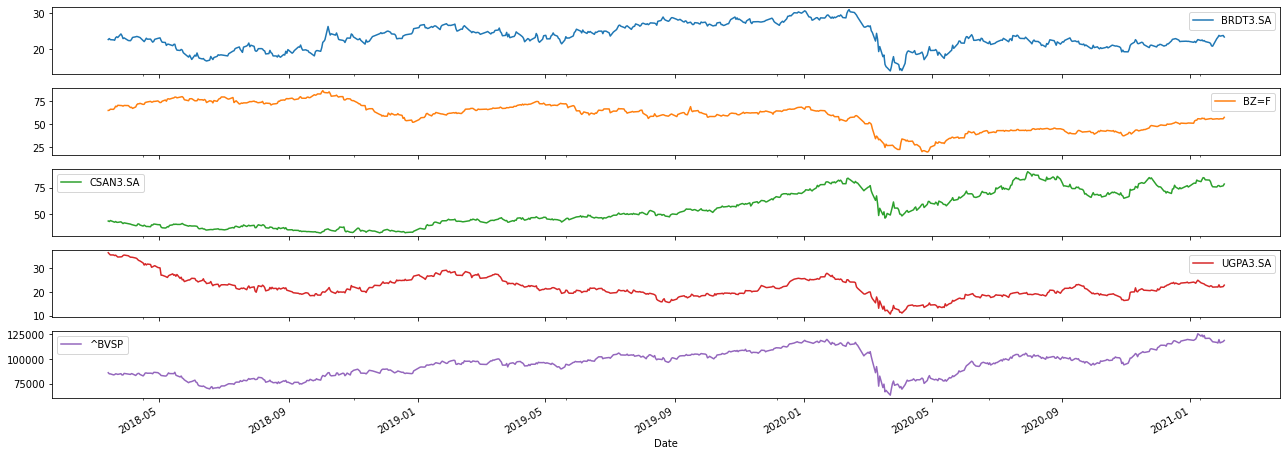

In [13]:
fechamento_3_limpo.plot(subplots=True, figsize=(22,8))

In [10]:
volume_last_3_anos = volume.tail(252*3)

In [14]:
volume_3_limpo = volume_last_3_anos.dropna() 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA49C1A7F0>,
      dtype=object)

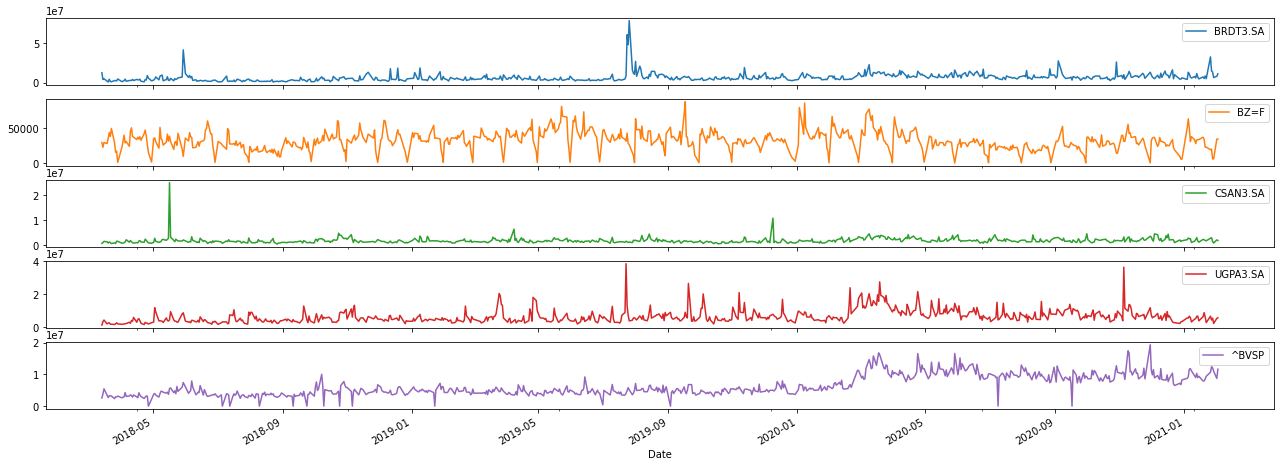

In [15]:
volume_3_limpo.plot(subplots=True, figsize=(22,8))

In [17]:
fechamento.corr()

,BRDT3.SA,BZ=F,CSAN3.SA,UGPA3.SA,^BVSP
BRDT3.SA,1.000000,0.198018,0.194264,0.257208,0.703244
BZ=F,0.198018,1.000000,-0.297316,-0.322368,-0.226429
CSAN3.SA,0.194264,-0.297316,1.000000,0.024926,0.692620
UGPA3.SA,0.257208,-0.322368,0.024926,1.000000,-0.669488
^BVSP,0.703244,-0.226429,0.692620,-0.669488,1.000000


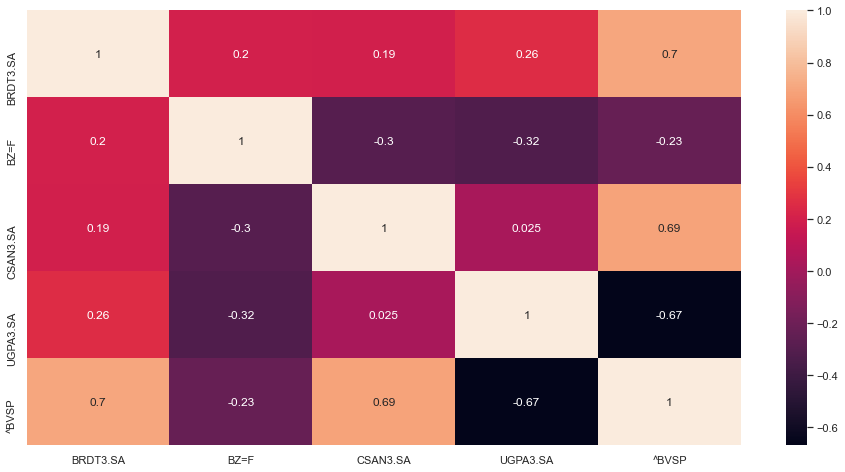

In [19]:
sns.heatmap(fechamento.corr(), annot=True)

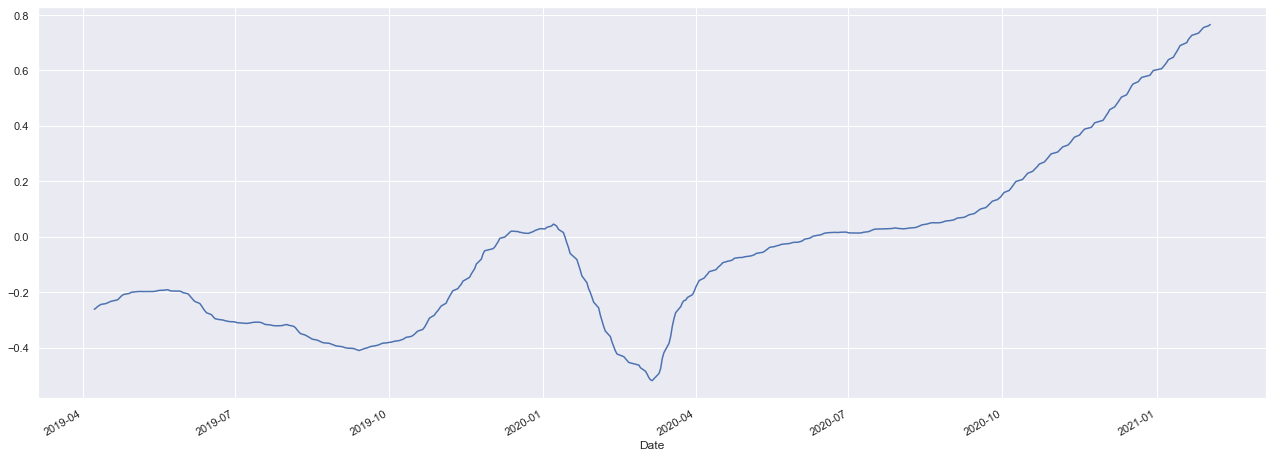

In [26]:
fechamento_3_limpo['CSAN3.SA'].rolling(252).corr(fechamento_3_limpo['BZ=F']).plot(figsize=(22,8))

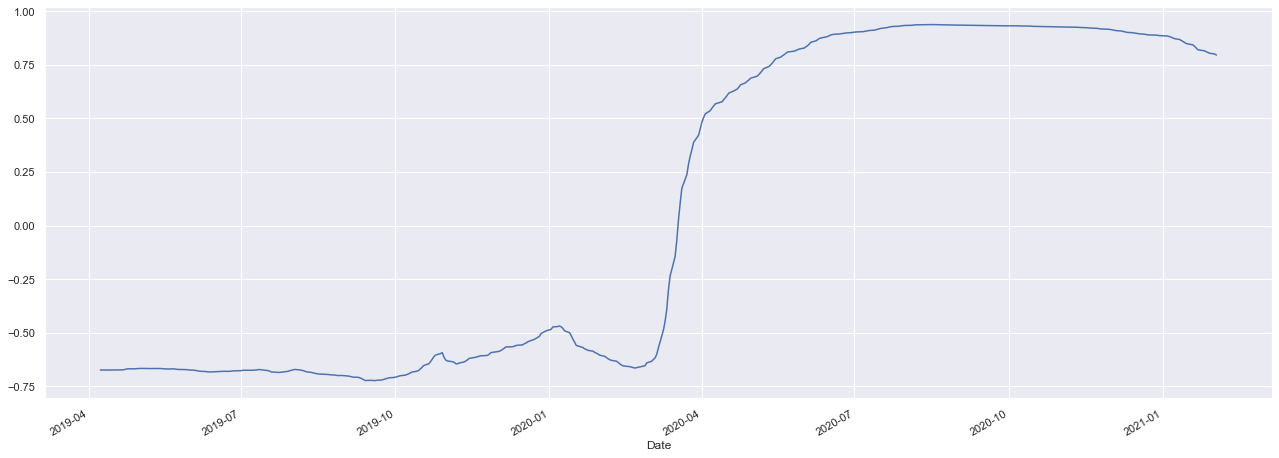

In [27]:
fechamento_3_limpo['BRDT3.SA'].rolling(252).corr(fechamento_3_limpo['BZ=F']).plot(figsize=(22,8))

In [25]:
fechamento

,BRDT3.SA,BZ=F,CSAN3.SA,UGPA3.SA,^BVSP
Date,,,,,
1993-04-27,NaN,NaN,NaN,NaN,24.500000
1993-04-28,NaN,NaN,NaN,NaN,24.299999
1993-04-29,NaN,NaN,NaN,NaN,23.700001
1993-04-30,NaN,NaN,NaN,NaN,24.100000
1993-05-03,NaN,NaN,NaN,NaN,24.100000
...,...,...,...,...,...
2021-01-28,23.799999,55.529999,77.150002,22.969999,119314.000000
2021-01-29,23.580000,55.880001,76.139999,22.010000,116007.000000
2021-02-01,23.770000,55.880001,76.879997,22.219999,117365.000000


In [28]:
!pip install pyfolio

You should consider upgrading via the 'C:\Users\pedro\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88683 sha256=9ab6886874b4c2c1c2ae1f7d7714435dd76117be9bba17ab50ba10a4aa23c52c
  Stored in directory: c:\users\pedro\appdata\local\pip\cache\wheels\42\16\92\9c9d49efccc497040268960f0825101cc9b1c6e41cdc5a409e
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39779 sha256=440fe67c6a646c6be937361d8c8b1662fe688fee63aab26f6876586a9435a363
  Stored in directory: c:\users\pedro\appdata\local\pip\cache\wheels\0d\68\bb\926065fb744e7d7cb67334cb1a9c696722abc8303e5dc9a8d0
Successfully built pyfolio empyrical


In [31]:
warnings.filterwarnings('ignore')

In [49]:
bench = ['^BVSP']
bench_data = web.get_data_yahoo(bench, period='3y')['Close']
bench_data_nona = bench_data.dropna()

[*********************100%***********************]  1 of 1 completed


In [50]:
other_tickers = ['ABEV3.SA', 'EQTL3.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA', 'PETR3.SA', 'PETR4.SA' ]

In [51]:
fechamento_outros = web.get_data_yahoo(other_tickers, period='3y')['Close']
volume_outros = web.get_data_yahoo(other_tickers, period='3y')['Volume']

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


In [52]:
retorno = fechamento_outros.pct_change()
retorno = retorno.dropna()
retorno

,ABEV3.SA,EQTL3.SA,PETR3.SA,PETR4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2018-02-16,0.005830,0.004152,-0.000482,0.001031,-0.000824,0.001741,-0.023067
2018-02-19,-0.004012,-0.000428,0.027992,0.032441,0.001650,0.009125,0.004373
2018-02-20,0.016562,0.019826,0.017840,0.019451,-0.003295,-0.020237,-0.000871
2018-02-21,-0.013650,-0.006294,-0.011070,-0.009296,0.004132,-0.015601,-0.004793
2018-02-22,0.000893,0.010556,0.029851,0.024198,-0.011523,0.019420,0.006567
...,...,...,...,...,...,...,...
2021-02-05,0.005128,0.006003,0.035190,0.035739,0.060076,0.037742,-0.001402
2021-02-08,-0.047194,-0.005115,-0.061056,-0.058291,-0.004304,0.014569,0.000585
2021-02-09,0.001339,0.007284,-0.026011,-0.020277,0.012968,0.002553,-0.005731


In [53]:
retorno.mean()

ABEV3.SA   -0.000314
EQTL3.SA    0.000897
PETR3.SA    0.001008
PETR4.SA    0.001075
USIM5.SA    0.000836
VALE3.SA    0.001354
WEGE3.SA    0.002480
dtype: float64

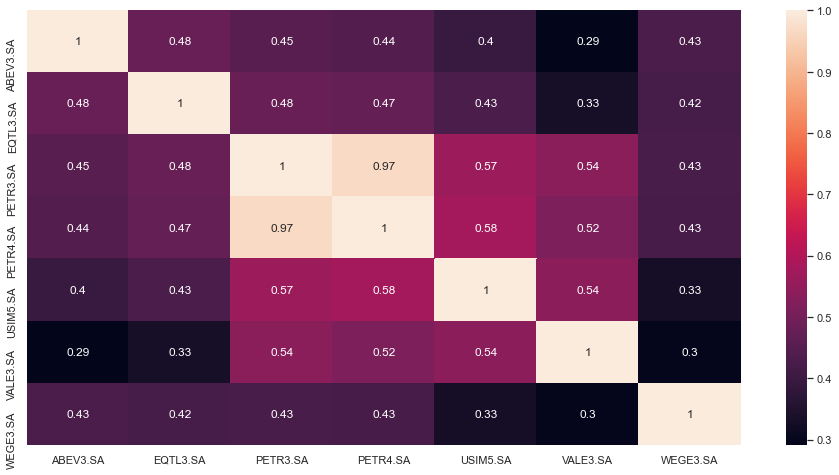

In [166]:
sns.heatmap(retorno.corr(), annot=True)

In [56]:
retorno.corr()

,ABEV3.SA,EQTL3.SA,PETR3.SA,PETR4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,1.000000,0.479403,0.452121,0.444999,0.396199,0.290576,0.429994
EQTL3.SA,0.479403,1.000000,0.480017,0.474580,0.431333,0.334853,0.422311
PETR3.SA,0.452121,0.480017,1.000000,0.969279,0.567340,0.536987,0.428906
PETR4.SA,0.444999,0.474580,0.969279,1.000000,0.578648,0.515178,0.425522
USIM5.SA,0.396199,0.431333,0.567340,0.578648,1.000000,0.540331,0.331252
VALE3.SA,0.290576,0.334853,0.536987,0.515178,0.540331,1.000000,0.296267
WEGE3.SA,0.429994,0.422311,0.428906,0.425522,0.331252,0.296267,1.000000


In [66]:
retorno.cov()

,ABEV3.SA,EQTL3.SA,PETR3.SA,PETR4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.000463,0.000208,0.000327,0.000318,0.000304,0.000174,0.000238
EQTL3.SA,0.000208,0.000406,0.000325,0.000318,0.000310,0.000188,0.000219
PETR3.SA,0.000327,0.000325,0.001131,0.001084,0.000681,0.000502,0.000371
PETR4.SA,0.000318,0.000318,0.001084,0.001106,0.000686,0.000476,0.000364
USIM5.SA,0.000304,0.000310,0.000681,0.000686,0.001273,0.000536,0.000304
VALE3.SA,0.000174,0.000188,0.000502,0.000476,0.000536,0.000773,0.000212
WEGE3.SA,0.000238,0.000219,0.000371,0.000364,0.000304,0.000212,0.000661


In [65]:
np.array(retorno.cov())

array([[0.0004629 , 0.00020792, 0.00032713, 0.00031837, 0.0003041 ,
        0.00017383, 0.00023792],
       [0.00020792, 0.00040637, 0.00032541, 0.00031813, 0.00031019,
        0.00018769, 0.00021893],
       [0.00032713, 0.00032541, 0.00113094, 0.00108392, 0.00068064,
        0.00050212, 0.00037094],
       [0.00031837, 0.00031813, 0.00108392, 0.00110576, 0.00068644,
        0.00047634, 0.00036389],
       [0.0003041 , 0.00031019, 0.00068064, 0.00068644, 0.00127265,
        0.00053597, 0.0003039 ],
       [0.00017383, 0.00018769, 0.00050212, 0.00047634, 0.00053597,
        0.00077313, 0.00021185],
       [0.00023792, 0.00021893, 0.00037094, 0.00036389, 0.0003039 ,
        0.00021185, 0.00066136]])

In [57]:
peso = (1/len(retorno.mean()))
ativos = len(retorno.mean())

In [64]:
x = np.arange(ativos, dtype=float)
matriz_peso = np.full_like(x, peso)

In [74]:
var_carteira = matriz_peso.dot(np.array(retorno.cov())).dot(matriz_peso.T)
print(var_carteira)

0.0004511092907364761


In [77]:
np.sqrt(var_carteira)

0.0212393335756204

In [88]:
retorno_diario = pd.Series(retorno.mean()*peso).sum()/100

In [90]:
retorno_diario

1.0477680111980678e-05

In [106]:
print(np.array2string(retorno_diario)[:5],'%')

1.047 %


In [109]:
initial_investment = 100000

avg_rets = retorno.mean()

port_mean = avg_rets.dot(matriz_peso)
 
# Calculate portfolio standard deviation
port_stdev = np.sqrt(matriz_peso.T.dot(retorno.cov()).dot(matriz_peso))
 
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
             
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [129]:
conf_level1 = 0.05
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [130]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

3388.7826854693412

1 day VaR @ 95% confidence: 3388.78
120 day VaR @ 95% confidence: 37122.25


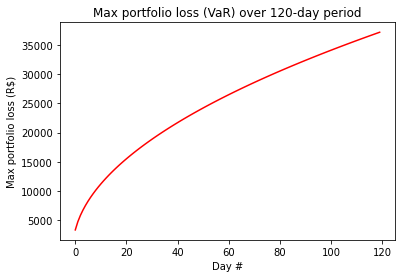

In [139]:
# Calculate n Day VaR
var_array = []
num_days = int(120)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    if x == num_days or x == 1:
        print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (R$)")
plt.title("Max portfolio loss (VaR) over %1d-day period" % (num_days))
plt.plot(var_array, "r")

In [ ]:
#ABEV3.SA	EQTL3.SA	PETR3.SA	PETR4.SA	USIM5.SA	VALE3.SA	WEGE3.SA

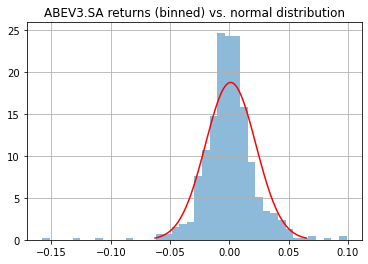

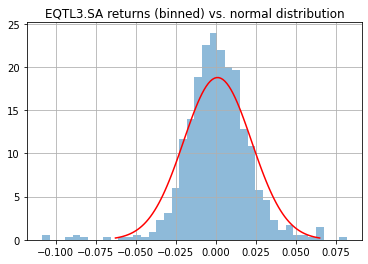

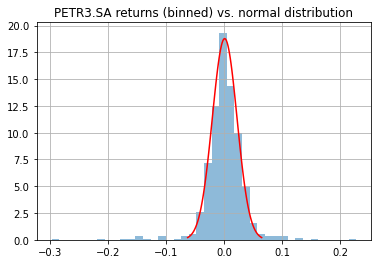

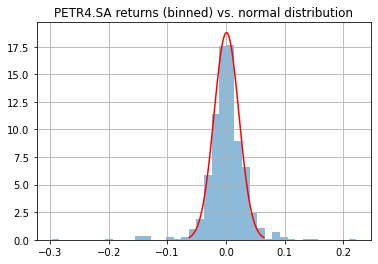

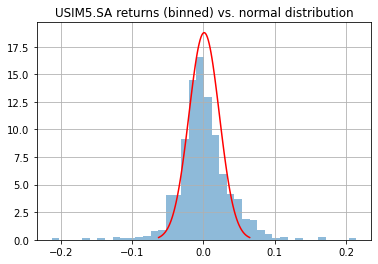

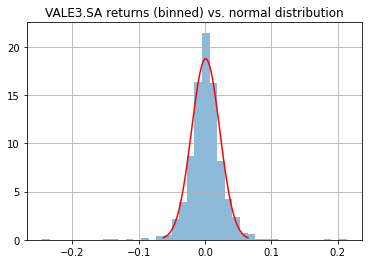

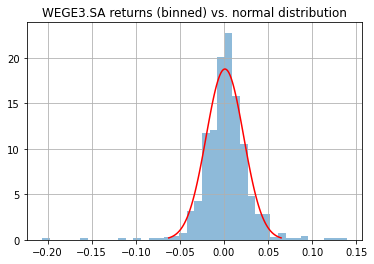

In [162]:
for acoes in np.array(retorno.columns):
    retorno[i].hist(bins=40, density=True, histtype="stepfilled",alpha=0.5)
    x = np.linspace(port_mean - 3*port_stdev, port_mean +3*port_stdev,100)
    plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
    plt.title(f"{i} returns (binned) vs. normal distribution")
    plt.show()

In [173]:
(100000 / peso) / fechamento_outros.iloc[0] 

ABEV3.SA    31390.135603
EQTL3.SA    50107.371984
PETR3.SA    33767.487480
PETR4.SA    36082.474936
USIM5.SA    57708.161038
VALE3.SA    15233.949693
WEGE3.SA    38872.276741
Name: 2018-02-15 00:00:00, dtype: float64

In [176]:
retorno_cummulated = (1 + retorno).cumprod()
retorno_cummulated

,ABEV3.SA,EQTL3.SA,PETR3.SA,PETR4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2018-02-16,1.005830,1.004152,0.999518,1.001031,0.999176,1.001741,0.976933
2018-02-19,1.001794,1.003722,1.027496,1.033505,1.000824,1.010881,0.981205
2018-02-20,1.018386,1.023622,1.045827,1.053608,0.997527,0.990424,0.980350
2018-02-21,1.004484,1.017180,1.034250,1.043814,1.001649,0.974973,0.975651
2018-02-22,1.005381,1.027917,1.065123,1.069072,0.990107,0.993906,0.982059
...,...,...,...,...,...,...,...
2021-02-05,0.703139,1.679313,1.461650,1.538660,1.149217,2.016540,4.745194
2021-02-08,0.669955,1.670723,1.372407,1.448969,1.144270,2.045919,4.747971
2021-02-09,0.670852,1.682892,1.336710,1.419588,1.159110,2.051143,4.720760


In [180]:
retorno_cummulated.iloc[:,:]

,ABEV3.SA,EQTL3.SA,PETR3.SA,PETR4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2018-02-16,1.005830,1.004152,0.999518,1.001031,0.999176,1.001741,0.976933
2018-02-19,1.001794,1.003722,1.027496,1.033505,1.000824,1.010881,0.981205
2018-02-20,1.018386,1.023622,1.045827,1.053608,0.997527,0.990424,0.980350
2018-02-21,1.004484,1.017180,1.034250,1.043814,1.001649,0.974973,0.975651
2018-02-22,1.005381,1.027917,1.065123,1.069072,0.990107,0.993906,0.982059
...,...,...,...,...,...,...,...
2021-02-05,0.703139,1.679313,1.461650,1.538660,1.149217,2.016540,4.745194
2021-02-08,0.669955,1.670723,1.372407,1.448969,1.144270,2.045919,4.747971
2021-02-09,0.670852,1.682892,1.336710,1.419588,1.159110,2.051143,4.720760


In [196]:
ibov_return=ibov.pct_change()
ibov_return_tf = ibov_return['Close'].tail(len(portfolio))
ibov_return_tf

Date
2018-02-15    0.041929
2018-02-16    0.002776
2018-02-19    0.003171
2018-02-20    0.011923
2018-02-21    0.002890
                ...   
2021-02-05    0.005568
2021-02-08   -0.003410
2021-02-09   -0.000728
2021-02-10   -0.008365
2021-02-11    0.007345
Name: Close, Length: 737, dtype: float64

In [194]:
len(portfolio)

737

In [181]:
portfolio = 100000/peso * retorno_cummulated

In [185]:
portfolio['sum']=portfolio.sum(axis=1)
portfolio['total_return']=portfolio['sum'].pct_change()
portfolio.dropna(inplace=True)

In [197]:
pf.create_full_tear_sheet(portfolio['total_return'], benchmark_rets=ibov_return_tf)

Start date,2018-02-19
End date,2021-02-11
Total months,35
,Backtest
Annual return,24.3%
Cumulative returns,89.0%
Annual volatility,32.8%
Sharpe ratio,0.83
Calmar ratio,0.52
Stability,0.64
Max drawdown,-46.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'